In [ ]:

import torch
import torch.nn as nn
from src.model.MiniMobileNet import MiniMobileNet
import matplotlib.pyplot as plt

In [2]:
model_path = 'best_model.pt'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
model = MiniMobileNet(csv_dim=1503, n_classes=8)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
print("-- Model loaded successfully --")

-- Model loaded successfully --


In [4]:
imgs = [torch.randn(1, 3, 224, 224) for _ in range(6)]
csv = torch.randn(1, 1503)
imgs_gpu = [img.to(device) for img in imgs]
csv_gpu = csv.to(device)


In [5]:
torch.onnx.export(model, (imgs_gpu, csv_gpu), "minimobilenet.onnx", opset_version=12)

In [ ]:
!netron minimobilenet.onnx

![model overview](images/minimobilenet.png)

🔹 Why `nn.BatchNorm2d(n)`


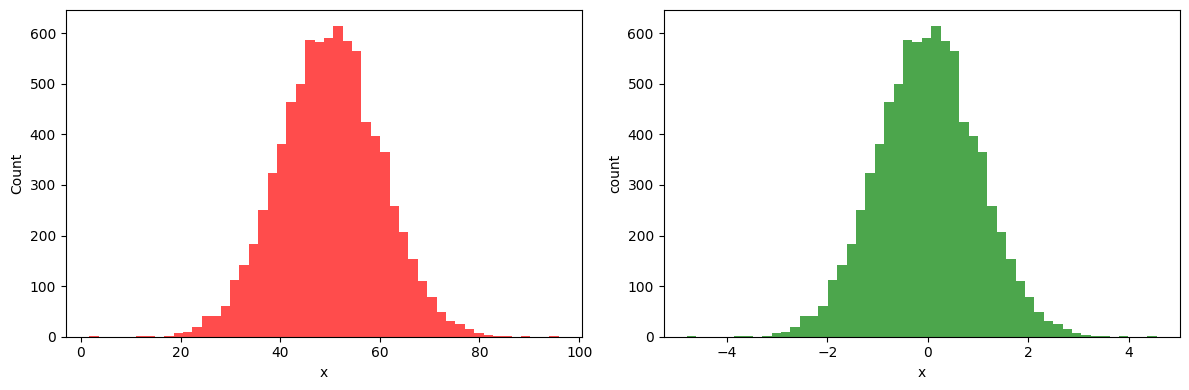

In [6]:
x = torch.randn(8, 16, 32, 32) * 10 + 50 

x_no_bn = x.clone()

bn = nn.BatchNorm2d(16)
x_bn = bn(x.clone())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(x_no_bn[:, 0].flatten().numpy(), bins=50, color='red', alpha=0.7)
axes[0].set_xlabel("x")
axes[0].set_ylabel("Count")

axes[1].hist(x_bn[:, 0].flatten().detach().numpy(), bins=50, color='green', alpha=0.7)
axes[1].set_xlabel("x")
axes[1].set_ylabel("count")

plt.tight_layout()
plt.show()

🧠 When it comes right after the last convolutional layer, it helps to **normalize the feature maps**, making the network more stable and easier to train.

📉 This leads to:
- Faster convergence during training
- Better regularization
- Reduced sensitivity to weight initialization

➡️ Why `DepthwiseSeparable`: `in × out × 3 × 3` vs `in × 3 × 3 + in × out × 1 × 1`

🧠 Standard Computation:
![🧠 Standard Computation](images/convolution-animation-3x3-kernel.gif)

⚡ Depthwise Separable Computation:
![⚡ Depthwise Separable Computation](images/depthwise-separable-convolution-animation-3x3-kernel.gif)



➡️ Why no activation function like `softmax` at the end of the classifier

🧾 Because we use `nn.CrossEntropyLoss()`, which expects **raw logits**:
- It internally applies `log_softmax` + `NLLLoss`.